<a href="https://colab.research.google.com/github/RM-RAMASAMY/Clustering-Algorithms/blob/main/anomaly_detection_using_pyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomalies in time series data
Anomalies in time series data represent significant deviations from the expected or typical patterns.  They are observations that lie outside the normal range of variation for the data.  These deviations can be caused by a variety of factors, including:

* **Outliers:**  These are single data points that are far from other data points.  They could be measurement errors, data entry mistakes, or genuine, rare events.
* **Change Points:**  These represent a sudden shift in the statistical properties of the time series.  For example, a sudden increase in sales after a marketing campaign or a drop in website traffic after a server outage.
* **Seasonality Shifts:** Variations in the usual seasonal patterns.  For instance, a usually high-selling product selling significantly less during a specific holiday season.
* **Trend Changes:**  Alterations in the overall upward or downward direction of the time series.  For instance, a company's growth rate slowing down or speeding up.
* **Cyclic Patterns:**  Deviations from a typical cyclical pattern.  For example, unexpected peaks or troughs in economic cycles.

## Identifying anomalies is important for various reasons:

* **Fraud Detection:** Unusual transactions or activities can signal fraudulent behavior.
* **Predictive Maintenance:** Detecting anomalies in sensor data from machines can help predict equipment failures.
* **Quality Control:** Monitoring manufacturing processes for anomalies helps ensure product quality.
* **Network Security:** Detecting unusual network traffic can help identify and prevent cyberattacks.
* **Business Performance Monitoring:** Identifying drops in sales or increases in customer churn can alert businesses to potential problems.


There are many different methods for detecting anomalies in time series data, ranging from simple statistical methods to complex machine learning algorithms.  The best approach depends on the specific characteristics of the data and the goals of the analysis.

## Methods for Anomaly Detection
1. **Statistical Methods**: Simple threshold-based techniques where anomalies are defined as data points deviating significantly from the expected pattern.
2. **Clustering Techniques**: Methods like k-means and DBSCAN that group data points and flag those that do not fit into any cluster as anomalies.
3. **Machine Learning Models**: Supervised and unsupervised learning algorithms that learn to identify normal patterns and detect outliers.
4. **Deep Learning Approaches**:
   - **Autoencoders**: Neural networks trained to compress and reconstruct time series data, with high reconstruction errors signaling anomalies.
   - **Recurrent Neural Networks (RNNs)**: A powerful model that can capture temporal dependencies, useful for detecting anomalies in sequential data.

## When to Use Each Method
- **Threshold-based methods** are simple but may not handle complex data distributions well.
- **Clustering** methods work best when the data has natural groupings.
- **Autoencoders and RNNs** are more suitable for complex, high-dimensional data and when capturing temporal dependencies is crucial.

In [4]:
!pip install pyod numpy pandas matplotlib scikit-learn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.ecod import ECOD  # Empirical-Cumulative Distribution-based Outlier Detection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [6]:
# Step 1: Generate synthetic time-series data
np.random.seed(42)
n_points = 500

In [7]:
# Simulating normal electricity consumption (random walk)
normal_data = np.cumsum(np.random.normal(0, 1, n_points))

In [8]:
# Injecting anomalies (spikes and drops)
anomalies = np.random.choice(n_points, size=15, replace=False)
anomaly_values = normal_data[anomalies] + np.random.choice([-1, 1], size=15) * np.random.normal(10, 5, 15)
data_with_anomalies = normal_data.copy()
data_with_anomalies[anomalies] = anomaly_values

In [9]:
# Labels for evaluation: 0 for normal, 1 for anomalies
labels = np.zeros(n_points)
labels[anomalies] = 1

In [10]:
# Creating a dataframe
time_series_df = pd.DataFrame({
    "time": np.arange(n_points),
    "value": data_with_anomalies,
    "label": labels
})

In [11]:
# Step 2: Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(time_series_df["value"].values.reshape(-1, 1))

In [12]:
# Step 3: Train ECOD model
clf = ECOD()  # Empirical-Cumulative Distribution-based Outlier Detection
clf.fit(X)

ECOD(contamination=0.1, n_jobs=1)

In [13]:
# Predictions
pred_scores = clf.decision_function(X)  # Anomaly scores
predictions = clf.predict(X)  # 0 for normal, 1 for anomaly

In [14]:
# Step 4: Visualization and Evaluation
time_series_df["predicted_label"] = predictions

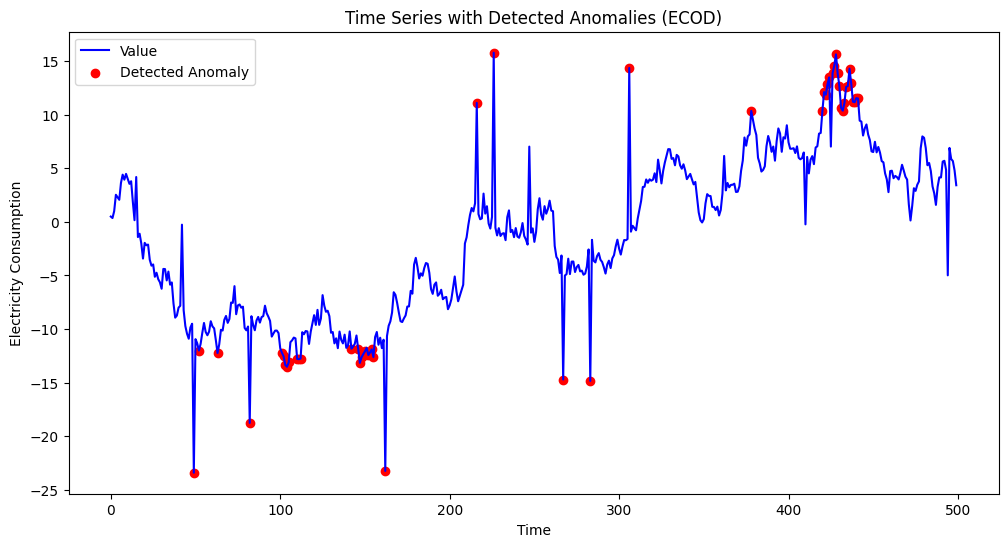

In [15]:
# Plot the time series and detected anomalies
plt.figure(figsize=(12, 6))
plt.plot(time_series_df["time"], time_series_df["value"], label="Value", color="blue")
plt.scatter(
    time_series_df.loc[time_series_df["predicted_label"] == 1, "time"],
    time_series_df.loc[time_series_df["predicted_label"] == 1, "value"],
    color="red",
    label="Detected Anomaly",
)
plt.legend()
plt.title("Time Series with Detected Anomalies (ECOD)")
plt.xlabel("Time")
plt.ylabel("Electricity Consumption")
plt.show()


In [16]:
# Evaluation metrics
print(classification_report(time_series_df["label"], time_series_df["predicted_label"]))

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.95       485
         1.0       0.16      0.53      0.25        15

    accuracy                           0.90       500
   macro avg       0.57      0.72      0.60       500
weighted avg       0.96      0.90      0.93       500

